# Stock Market Analysis
### By - Raghav Gupta, Abhinav Bahl and Romil Jangalwa

# Introduction
Due to our extremely limited knowledge of the financial field, this tutorial will have a focus on acquiring and visualizing the data, with a bit of data analysis some possible conclustion from the illustrated concepts.

# Motivation
This tutorial will introduce a few basic methods for processing financial data, 
with a focus on individual stock growth. Financial data is an area where many individuals
and corporations take interest in with the hope of predicting market movement and 
direction in order to make informed trade decisions for profit. As with many data 
    science topics, the goal would be to utilize the data and interpret in a meaningful 
    way to identify and/or predict trends. We will be examining and analyzing couple of 
    industries and top stocks from those industries to find the best stock to invest in.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Objective
To try to predict and analyze stocks for various companies in different sectors and also an intra-sector comparison of these companies. We will aim to find companies with the low risk and high returns. 

# Data
We picked the data from yahoo.com/finance of the top 5 companies from technology, finance and healthcare sectors based on their market caps from NASDAQ's dataset available online. We found out that Apple, Oracle, Google, Microsoft and Facebook lead the line in the technological sector with CitiGroup, JPMorgan, HSBC, Wells Fargo and Bank of America leading the line in the Financial sector while Johnsons and Johnsons, Pfizer, United Health Group, Novartis and AbbVie in line for the Healthcare sector.

## Technology Sector

In [2]:
apple = pd.read_csv("aapl.csv")
oracle = pd.read_csv("orcl.csv")
google = pd.read_csv("googl.csv")
microsoft = pd.read_csv("msft.csv")
facebook = pd.read_csv("fb.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-15,169.970001,170.320007,168.380005,169.080002,169.080002,29158100
1,2017-11-16,171.179993,171.869995,170.300003,171.100006,171.100006,23637500
2,2017-11-17,171.039993,171.389999,169.639999,170.149994,170.149994,21899500
3,2017-11-20,170.289993,170.559998,169.559998,169.979996,169.979996,16262400
4,2017-11-21,170.779999,173.699997,170.779999,173.139999,173.139999,25131300


The data available is for the past 30 days as the historical data provided on yahoo is for a month and on the weekends the market is closed hence, there is no data for the weekends which results in 21 values in the datatset.

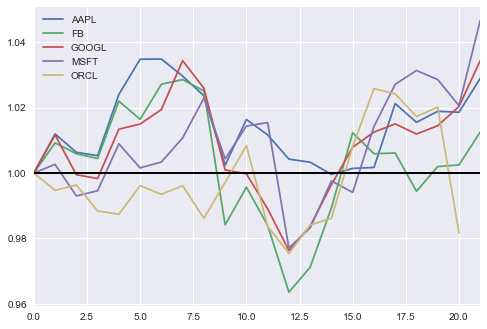

In [3]:
stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
                      "MSFT": microsoft["Adj Close"],
                      "FB": facebook["Adj Close"],
                      "ORCL": oracle["Adj Close"],
                       "GOOGL": google["Adj Close"]})
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
plt.show()

The graph above shows the monthly comparative stock return average starting with $1 through a 1 month period. Oracle is the only one with a loss from the starting of the month and Microsoft has the highest jump on a total average. There was a steep drop in tech stocks in the middle but rose up quickly. Apple being the only stock which wasn't that volatile as compared to the other stocks. The lambda function created works by calculating the returns based on the simple formula that the returns = price(begining)/ price(end) for a month.

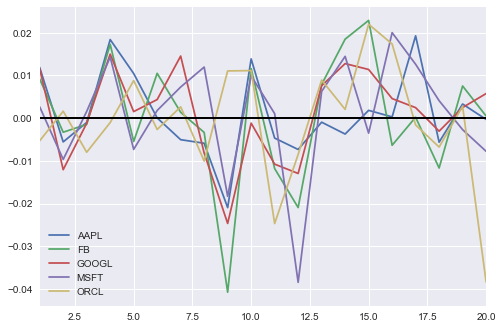

In [4]:
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change = stock_change.dropna()
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
plt.show()

The graph above shows the monthly absolute stock return through a 1 month period. The stock jumps show correlation with each other when analyzing absolute values as the tech sector is volatilve comapared to other sectors and there is somewhat similar stock variations throughout.

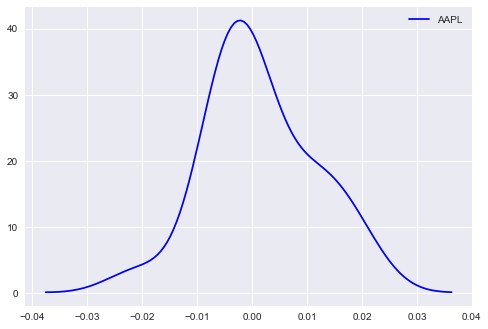

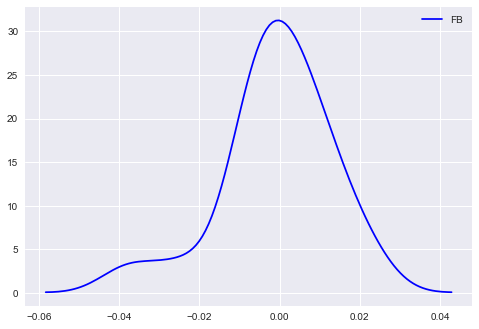

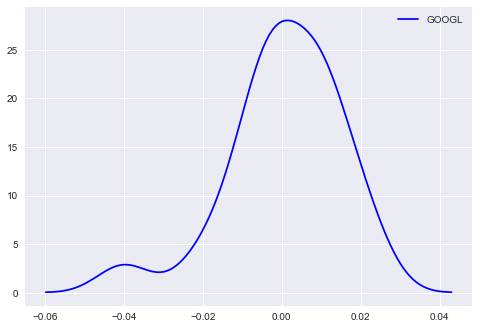

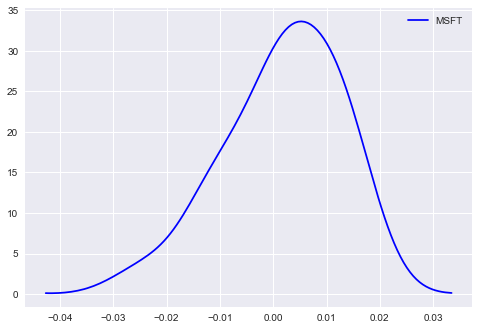

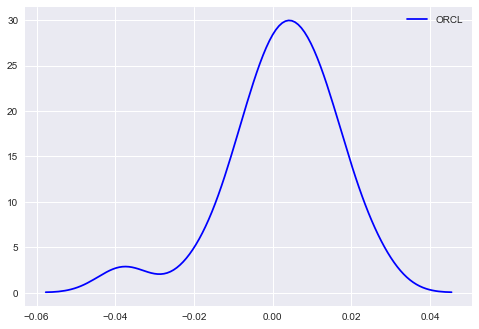

In [5]:
v = [apple,oracle,facebook,google,microsoft]
for i in v:
    i['Daily Return'] = i['Adj Close'].pct_change()

k = 0
for i in v:
        sns.kdeplot(i['Daily Return'].dropna(),
            color = 'blue', label = stock_return.columns.values[k])
        k=k+1
        plt.legend()
        plt.show()

The above graphs show daily returns through a monthly period for the specified tech companies. Analysis shows that both Facebook and Apple have an average negative daily return on a month long basis while Microsoft, Oracle and Google have values ranging between 0.00 and 0.02.


## Healthcare Sector

In [6]:
JNJ = pd.read_csv("jnj.csv")
ABBV = pd.read_csv("abbv.csv")
PFE = pd.read_csv("pfe.csv")
NVS = pd.read_csv("nvs.csv")
UNH = pd.read_csv("unh.csv")

In [7]:
UNH.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-15,210.880005,211.979996,209.619995,209.860001,209.153809,1816300
1,2017-11-16,210.380005,212.009995,209.899994,211.130005,210.419540,1919600
2,2017-11-17,210.460007,211.460007,209.149994,209.899994,209.193665,1887500
3,2017-11-20,210.000000,210.679993,209.580002,210.250000,209.542496,2040400
4,2017-11-21,211.130005,212.850006,210.750000,212.600006,211.884598,2327200


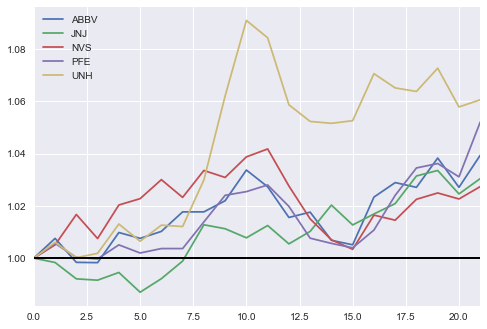

In [8]:
stocks_health = pd.DataFrame({"JNJ": JNJ["Adj Close"],
                      "PFE": PFE["Adj Close"],
                      "NVS": NVS["Adj Close"],
                      "UNH": UNH["Adj Close"],
                       "ABBV": ABBV["Adj Close"]})
stock_return_health = stocks_health.apply(lambda x: x / x[0])
stock_return_health = stock_return_health.dropna()
stock_return_health.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
plt.show()

The graph above shows the monthly comparative stock return average starting with \$1 through a 1 month period. United Health Group has very high monthly average returns soaring up to almost 1.1% but then settling back down, but still the highest, at 1.06%. On the other hand, all 4 competitors seem to have an correlated flow with Johnsons and Johnsons having a negative start but recovering back tothe settly at about $1.025%. There is a continous gradual increase in Healthcare stocks throughout the month. The lambda function created works by calculating the returns based on the simple formula that the returns = price(begining)/ price(end) for a month.

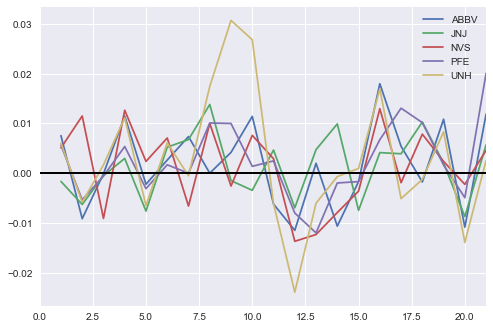

In [9]:
stock_change_health = stocks_health.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_return_health = stock_change_health.dropna()
stock_change_health.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
plt.show()

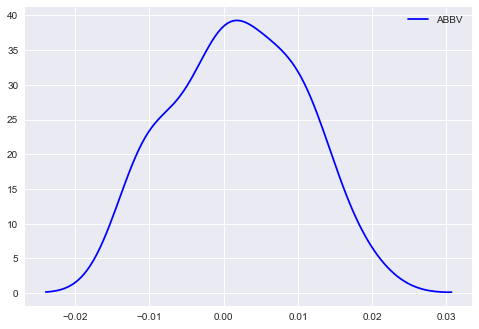

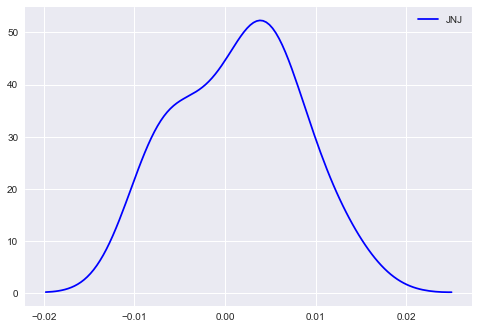

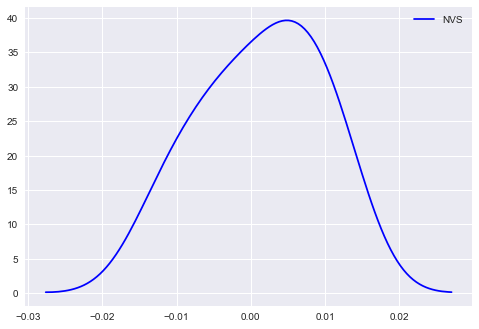

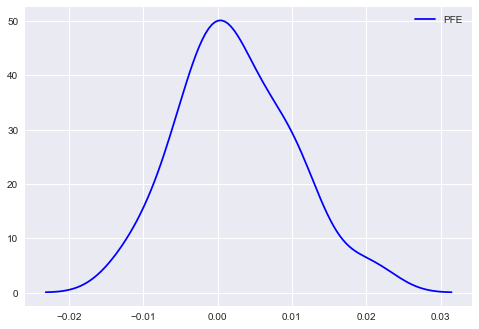

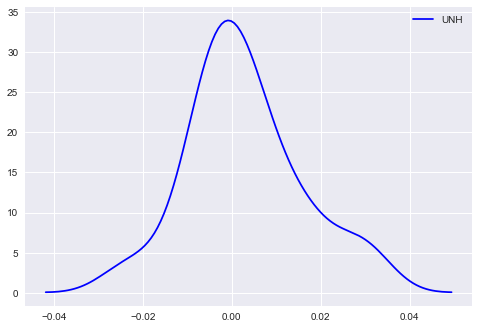

In [10]:
v1 = [ABBV,JNJ,NVS,PFE,UNH]
for i in v1:
    i['Daily Return'] = i['Adj Close'].pct_change()
k = 0
for i in v1:
        sns.kdeplot(i['Daily Return'].dropna(), 
            color = 'blue', label = stock_return_health.columns.values[k])
        k=k+1
        plt.legend()
        plt.show() 

The above graphs show daily returns through a monthly period for the specified Healthcare companies. Analysis shows that only United Health Group have an average negative daily return on a month long basis while Jonhsons and Johnsons and Novartis have high positive values, up to about 0.01.

## Financial Sector

In [11]:
C = pd.read_csv("c.csv")
HSBC = pd.read_csv("hsbc.csv")
BAC = pd.read_csv("bac.csv")
WFC = pd.read_csv("wfc.csv")
JPM = pd.read_csv("jpm.csv")
WFC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-16,53.950001,54.860001,53.860001,54.599998,54.599998,26361800
1,2017-11-17,54.209999,54.459999,53.970001,54.150002,54.150002,15814800
2,2017-11-20,54.119999,54.209999,53.849998,54.049999,54.049999,16943100
3,2017-11-21,54.080002,54.580002,53.990002,54.520000,54.520000,13757000
4,2017-11-22,54.459999,54.619999,54.029999,54.060001,54.060001,11421700


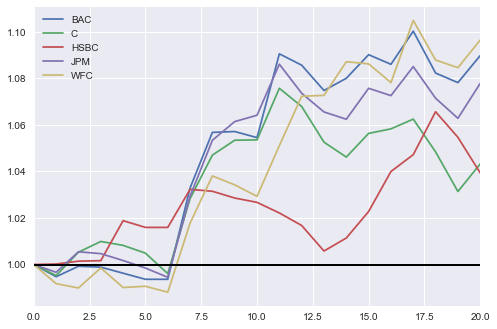

In [12]:
stocks_finance = pd.DataFrame({"JPM": JPM["Adj Close"],
                      "C": C["Adj Close"],
                      "BAC": BAC["Adj Close"],
                      "WFC": WFC["Adj Close"],
                       "HSBC": HSBC["Adj Close"]})
stock_return_finance = stocks_finance.apply(lambda x: x / x[0])
stock_return_finance = stock_return_finance.dropna()
stock_return_finance.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
plt.show()

The graph above shows the monthly comparative stock return average starting with $1 through a 1 month period. Wells Fargo seems to be leading the chart in terms of monthly average jump with about 1.08% while HSBC and Citibank nearly tie for the least with around 1.04% . There is a continous gradual increase in Financial stocks thourghout the month. The lambda function created works by calculating the returns based on the simple formula that the returns = price(begining)/ price(end) for a month.

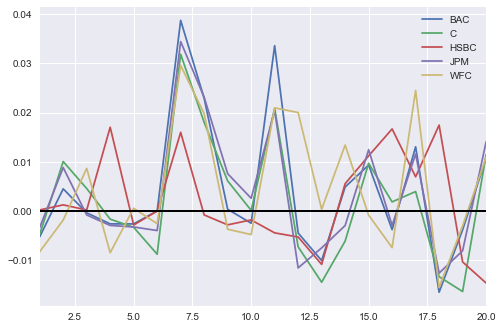

In [13]:
stock_change_finance = stocks_finance.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change_finance = stock_change_finance.dropna()
stock_change_finance.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
plt.show()

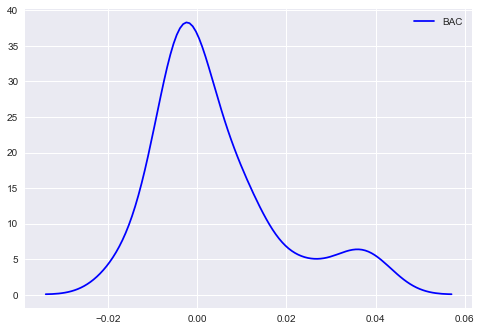

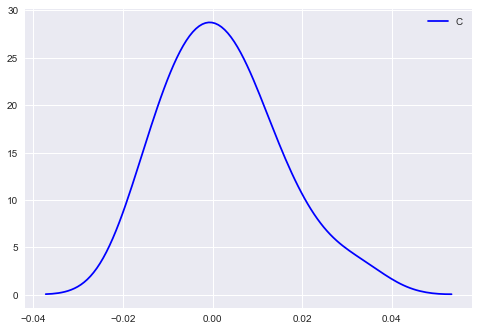

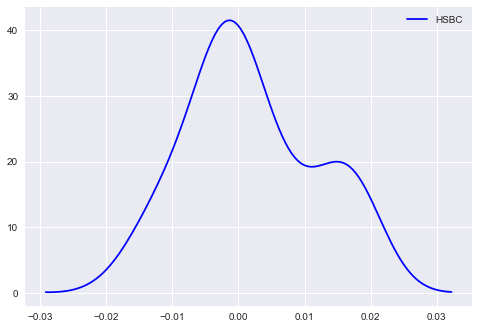

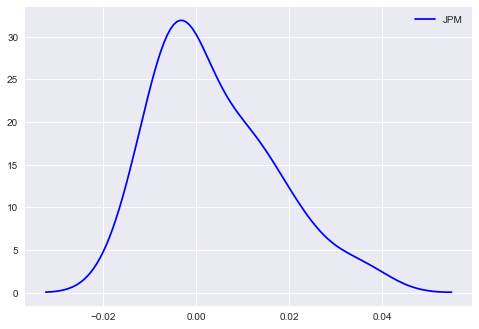

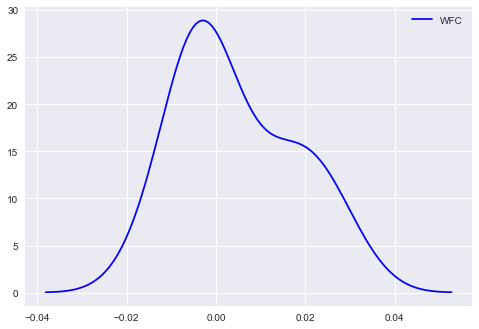

In [14]:
v1 = [BAC,C,HSBC,JPM,WFC]
for i in v1:
    i['Daily Return'] = i['Close'].pct_change()
k = 0
for i in v1:
        sns.kdeplot(i['Daily Return'].dropna(), 
            color = 'blue', label = stock_return_finance.columns.values[k])
        k=k+1
        plt.legend()
        plt.show()

The above graphs show daily returns through a monthly period for the specified Financial companies. Analysis shows that all 5 top Financial companies have an average negative daily return on a month long basis, showing how they create a constant demand in the market leading to shorting and negative change, which in terms leads to stock price rise.

# Data analysis on Daily closing values

## Technology Sector

In [15]:
closing_tech = pd.DataFrame({"AAPL": apple["Adj Close"].pct_change(),
                      "MSFT": microsoft["Adj Close"].pct_change(),
                      "FB": facebook["Adj Close"].pct_change(),
                      "ORCL": oracle["Adj Close"].pct_change(),
                       "GOOGL": google["Adj Close"].pct_change()})

In [16]:
closing_tech.dropna().head()

,AAPL,FB,GOOGL,MSFT,ORCL
1,0.011947,0.009216,0.011636,0.002651,-0.005285
2,-0.005552,-0.003285,-0.011998,-0.009615,0.001635
3,-0.000999,-0.001452,-0.001187,0.001578,-0.007956
4,0.018590,0.017455,0.015116,0.014419,-0.001028
5,0.010512,-0.005444,0.001542,-0.007286,0.008851


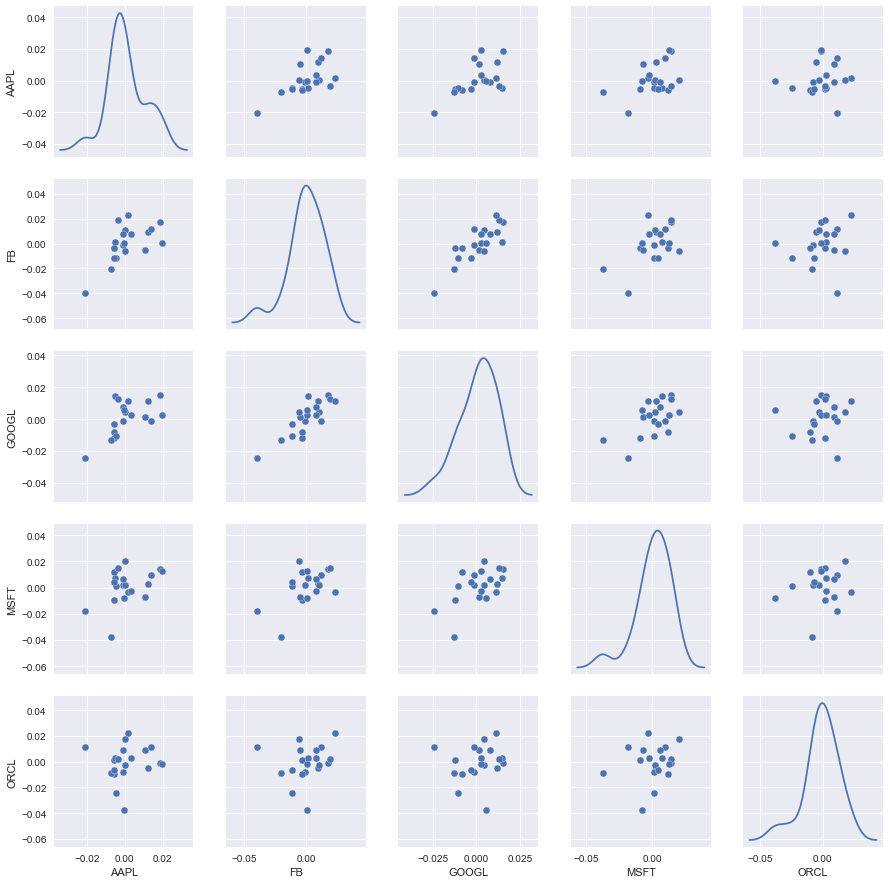

In [17]:
sns.pairplot(closing_tech.dropna(),diag_kind="kde")
plt.show()

The above scatterplots show correlation of stocks on a daily basis between the top 5 tech companies. There seems to 
be a uniform correlation between Facebook, Microsoft, Apple and Google while Oracle seems to differ with some extra Stock Drops through the month, displaying a spread-out scatterplot.

## Healthcare Sector

In [18]:
closing_health = pd.DataFrame({"JNJ": JNJ["Adj Close"].pct_change(),
                      "PFE": PFE["Adj Close"].pct_change(),
                      "NVS": NVS["Adj Close"].pct_change(),
                      "UNH": UNH["Adj Close"].pct_change(),
                       "ABBV": ABBV["Adj Close"].pct_change()})

In [19]:
closing_health.dropna().head()

,ABBV,JNJ,NVS,PFE,UNH
1,0.007573,-0.001654,0.005085,0.005656,0.006052
2,-0.009103,-0.006265,0.011564,-0.005343,-0.005826
3,-0.000107,-0.000507,-0.009050,-0.000565,0.001668
4,0.011538,0.002972,0.012737,0.005375,0.011177
5,-0.002218,-0.007590,0.002373,-0.003095,-0.006491


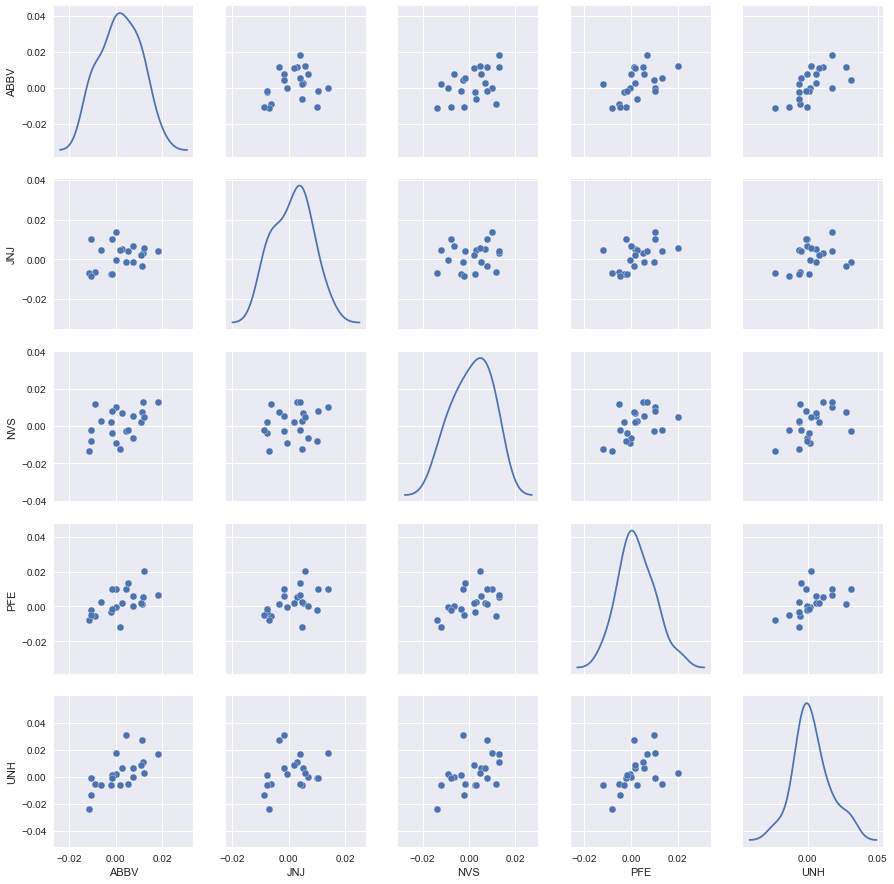

In [20]:
sns.pairplot(closing_health.dropna(),diag_kind="kde")
plt.show()

The above scatterplots show correlation of stocks on a daily basis between the top 5 healthcare companies. There seems to be a uniform correlation between all 5 for the most part, while United Health Group stocks seems to differ with some extra Stock Rises through the month, displaying a spread-out scatterplot. Healthcare sector is also made up from different industries liek pharmaceuticals and devices to health insurers and hospitals – and each has different dynamics

## Finacial Sector

In [21]:
closing_finance = pd.DataFrame({"JPM": JPM["Adj Close"].pct_change(),
                      "C": C["Adj Close"].pct_change(),
                      "BAC": BAC["Adj Close"].pct_change(),
                      "WFC": WFC["Adj Close"].pct_change(),
                       "HSBC": HSBC["Adj Close"].pct_change()})

In [22]:
closing_finance.dropna().head()

,BAC,C,HSBC,JPM,WFC
1,-0.005232,-0.004744,0.000207,-0.003351,-0.008242
2,0.004508,0.010094,0.001243,0.008865,-0.001847
3,-0.000374,0.004580,0.000207,-0.000808,0.008696
4,-0.002619,-0.001658,0.017167,-0.002931,-0.008437
5,-0.002626,-0.003321,-0.002847,-0.003244,0.000555


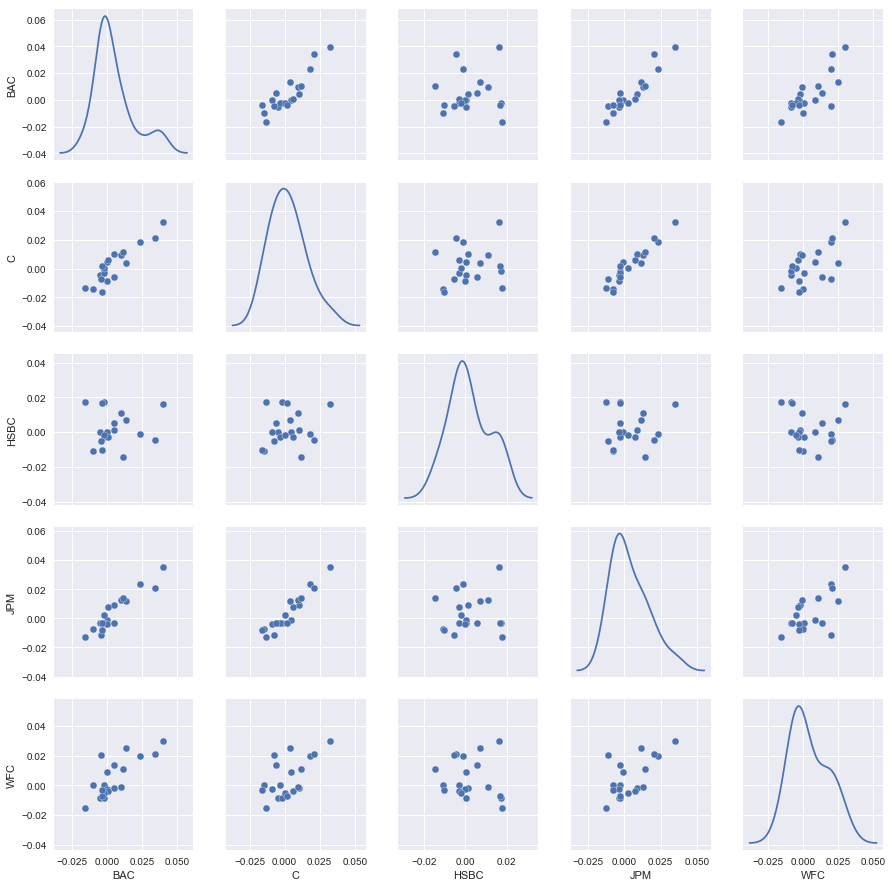

In [23]:
sns.pairplot(closing_finance.dropna(),diag_kind="kde")
plt.show()

The above scatterplots show correlation of stocks on a daily basis between the top 5 Fiancial companies. There seems to be a uniform correlation between Bank of America, JPMorgan and Citibank, while HSBC seem to have a high stock drop level and Wells Fargo has a high stock return value.

# Industry Risk Comparison

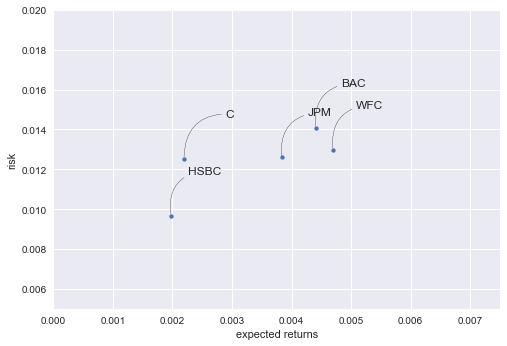

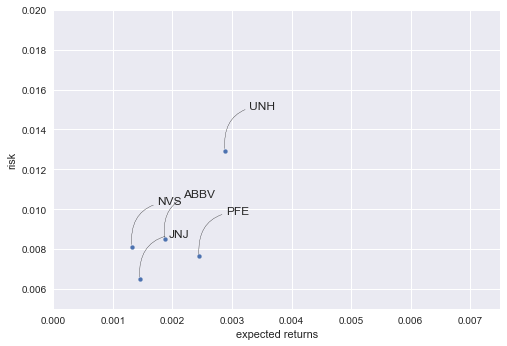

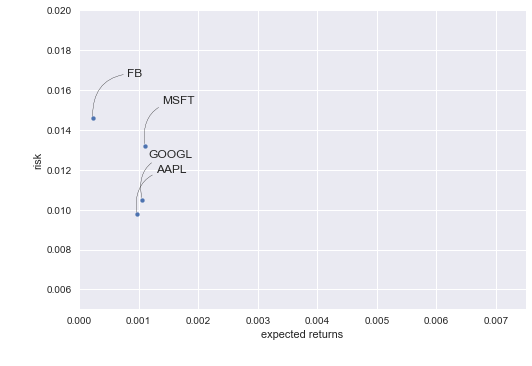

In [24]:
return1 = closing_finance.dropna()
return2 = closing_health.dropna()
return3 = closing_tech.dropna()

return4 = [return1, return2, return3]
area = np.pi*5

for i in return4:
    plt.scatter(i.mean(), i.std(),alpha = 1,s =area)
    plt.ylim([0.005,0.02])
    plt.xlim([0.00,0.0075])

    plt.xlabel('expected returns')
    plt.ylabel('risk')

    for label, x, y in zip(i.columns, i.mean(), i.std()):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (50, 40),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.5'))
    plt.show()


The above scatterplots display information gathered on daily percentage helps infer the Risk Analysis for different industrie by calculating the expected return mean return of the stock and standard deviation. The graph from the financial sector shows that HSBC has the lowest risk but at the same time offers low returns whereas Bank of America has the highest risk and somewhat high returns. Suprisngly, Wells Fargo has even better returns with risk lower than that of Bank of America. The healthcare sector graph shows that the UnitedHealth group has very high risk as compared to the other companies and Johnson and Johnsons has the least risk. The maximum returns in the healthcare sector is from Pfizer. The technology sector shows us that Facebook has a very high risk factor and Apple being the least risky one and at the same time offers a high return as compared to the other tech companies.

In [25]:
closing_final = pd.DataFrame({"JPM": JPM["Adj Close"].pct_change(),
                      "C": C["Adj Close"].pct_change(),
                      "BAC": BAC["Adj Close"].pct_change(),
                      "WFC": WFC["Adj Close"].pct_change(),
                       "HSBC": HSBC["Adj Close"].pct_change(),
                        "JNJ": JNJ["Adj Close"].pct_change(),
                      "PFE": PFE["Adj Close"].pct_change(),
                      "NVS": NVS["Adj Close"].pct_change(),
                      "UNH": UNH["Adj Close"].pct_change(),
                       "ABBV": ABBV["Adj Close"].pct_change(),
                        "AAPL": apple["Adj Close"].pct_change(),
                      "MSFT": microsoft["Adj Close"].pct_change(),
                      "FB": facebook["Adj Close"].pct_change(),
                      "ORCL": oracle["Adj Close"].pct_change(),
                       "GOOGL": google["Adj Close"].pct_change()})

# Overall cross indsutry risk analysis

In [26]:
closing_final.dropna().head()

,AAPL,ABBV,BAC,C,FB,GOOGL,HSBC,JNJ,JPM,MSFT,NVS,ORCL,PFE,UNH,WFC
1,0.011947,0.007573,-0.005232,-0.004744,0.009216,0.011636,0.000207,-0.001654,-0.003351,0.002651,0.005085,-0.005285,0.005656,0.006052,-0.008242
2,-0.005552,-0.009103,0.004508,0.010094,-0.003285,-0.011998,0.001243,-0.006265,0.008865,-0.009615,0.011564,0.001635,-0.005343,-0.005826,-0.001847
3,-0.000999,-0.000107,-0.000374,0.004580,-0.001452,-0.001187,0.000207,-0.000507,-0.000808,0.001578,-0.009050,-0.007956,-0.000565,0.001668,0.008696
4,0.018590,0.011538,-0.002619,-0.001658,0.017455,0.015116,0.017167,0.002972,-0.002931,0.014419,0.012737,-0.001028,0.005375,0.011177,-0.008437
5,0.010512,-0.002218,-0.002626,-0.003321,-0.005444,0.001542,-0.002847,-0.007590,-0.003244,-0.007286,0.002373,0.008851,-0.003095,-0.006491,0.000555


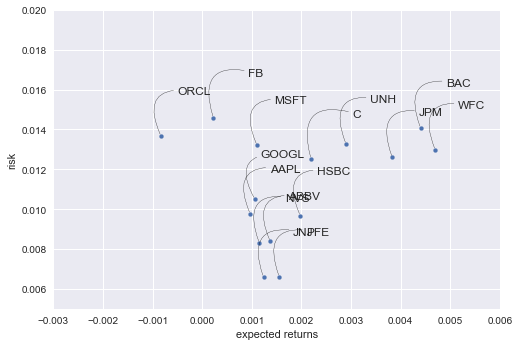

In [27]:
return_data = closing_final.dropna()

area = np.pi*5

plt.scatter(return_data.mean(), return_data.std(),alpha = 1,s =area)

plt.ylim([0.005,0.02])
plt.xlim([-0.003,0.006])

plt.xlabel('expected returns')
plt.ylabel('risk')

for label, x, y in zip(return_data.columns, return_data.mean(), return_data.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 40),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.9'))
plt.show()

From the graph above we see that Wells Fargo is the leader in terms of returns and Pfizer has the lowest risk factor across these three industries. Facebook has the highest risk factor and Oracle gives least returns. Rest of the companies are somewhere in the middle from these four outliers. 

# Conclusion

We conclude that Wells Fargo from the Financial sector would be the best company to invest on with somewhat lower risk and high returns. At the same time, we found out that Oracle is a company to avoid when investing in stocks. Facebook has the highest risk but doesn't offer much returns. Pfizer is the least risky one but you can expect low returns at the same time. 

# Subjective Evaluation
We try to build exigence throughout the project by first evaluating top companies within their own sectors and then correlating those completely different sectors together to show low risk long term investment oppurtunities as well as high risk high reward ones

# Other Resources
https://www.disnat.com/en/learning/trading-basics/stock-basics/what-causes-stock-prices-to-change: to learn about why stock prices fluctuate.

https://investorplace.com/2017/04/wells-fargo-should-you-buy-wfc-stock-3-pros-3-cons/#.WjTHBrQ-eAw: industry analysis on why you should buy Wells Fargo stocks.

https://www.fidelity.com/viewpoints/retirement/why-you-need-stocks: why do we need to invest in stocks

https://finance.yahoo.com: to views stock prices

http://www.nasdaq.com/screening/companies-by-industry.aspx?industry=Health+Care: NASDAQ market cap for stocks